## Observations and Insights 

In [1]:
# Dependencies and Setup:

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files:

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results files.

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Print a snippet of the mouse data to become familiar with its layout and contents.

mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Print a snippet of the study results data to become familiar with its layout and contents.

study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset.

study_data_merged_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview.

study_data_merged_df.head(3)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [5]:
# Determine the total number of columns and rows.

study_data_merged_df.shape


(1893, 8)

In [6]:
# Rename column headers with a consistent style to avoid conflicts in future code.

study_data_merged_df=study_data_merged_df.rename(columns={"Mouse ID": "Mouse_ID", "Drug Regimen": "Drug_Regimen", "Age_months": "Age_Months", "Weight (g)": "Weight_Grams", "Tumor Volume (mm3)": "Tumor_Vol_mm3", "Metastatic Sites": "Metastatic_Sites"})
study_data_merged_df.head(3)


,Mouse_ID,Drug_Regimen,Sex,Age_Months,Weight_Grams,Timepoint,Tumor_Vol_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [7]:
# Check the number of different mice in the study.

number_mice=study_data_merged_df.Mouse_ID.nunique()
print(f"There are {number_mice} mice in the study.")


There are 249 mice in the study.


In [8]:
# Search for duplicate 'Mouse Id & Timepoint' combinations in the data.

duplicate_checklist =study_data_merged_df.duplicated(["Mouse_ID", "Timepoint"])


# Count the number of unique and duplicate combinations there are for 'Mouse ID & Timepoint' in the data.

count_duplicate_checklist=duplicate_checklist.value_counts()
count_duplicate_checklist


False    1888
True        5
dtype: int64

In [9]:
# Print the number of duplicate combinations of 'Mouse ID & Timepoint'.

Number_duplicates=count_duplicate_checklist.iloc[1]
Number_duplicates

print(f"There are {Number_duplicates} duplicate combinations of 'Mouse ID & Timepoint' in the data set.")


There are 5 duplicate combinations of 'Mouse ID & Timepoint' in the data set.


In [10]:
# Optional: Get all the duplicate rows based on 'Mouse ID & Timepoint' combination.

duplicate_rows_df=study_data_merged_df.loc[duplicate_checklist]
duplicate_rows_df

# These rows will soon be removed from the master data set, as will all other rows relating to Mouse IDs that appear on this list.


,Mouse_ID,Drug_Regimen,Sex,Age_Months,Weight_Grams,Timepoint,Tumor_Vol_mm3,Metastatic_Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
#Determine the number of duplicate mice.

number_mice=study_data_merged_df.Mouse_ID.nunique()
number_duplicate_mice=duplicate_rows_df.Mouse_ID.nunique()
print(f"Number of Duplicate Mouse IDs: {number_duplicate_mice}")


Number of Duplicate Mouse IDs: 1


In [12]:
# List the Mouse IDs that have duplicate 'Mouse ID & Timepoint' combinations in the data.

duplicate_IDs=duplicate_rows_df.Mouse_ID.unique()
duplicate_IDs_df=pd.DataFrame([{"duplicate_IDs": duplicate_IDs}])
duplicate_IDs


array(['g989'], dtype=object)

In [13]:
# Display all of the data associated with the Mouse ID(s) that caused duplicate 'Mouse ID & Timestamp' combinations.

Data_to_Delete=study_data_merged_df.loc[study_data_merged_df["Mouse_ID"].isin(duplicate_IDs), :]
Data_to_Delete

# Below is code which manually identifies data to be deleted, one Mouse ID at a time. It would be fine to use in this problem.
# The user would need to enter the Mouse_ID at the end of the code each time.
# In an experiment where multiple Mouse_Ids need to be deleted, using the code below would be time-consuming. 

# Matching_Rows=study_data_merged_df.loc[study_data_merged_df["Mouse_ID"]=="g989", :]
# Matching_Rows

,Mouse_ID,Drug_Regimen,Sex,Age_Months,Weight_Grams,Timepoint,Tumor_Vol_mm3,Metastatic_Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Determine the total number of rows that will need to be deleted from the study_data_merged_df data frame.

Data_to_Delete.shape


(13, 8)

In [15]:
# Clean the data frame by dropping ALL data relating to Mouse IDs where duplicate 'Mouse ID & Timepoint' combos were created.

Cleaned_df=study_data_merged_df.loc[~study_data_merged_df["Mouse_ID"].isin(duplicate_IDs), :]
Cleaned_df

# Below is code that one might use to manually remove undesirable Mouse-IDs from the dataframe.

# Data_to_Keep_df=study_data_merged_df.loc[study_data_merged_df["Mouse_ID"] != "g989", :]
# Data_to_Keep_df


,Mouse_ID,Drug_Regimen,Sex,Age_Months,Weight_Grams,Timepoint,Tumor_Vol_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Determine the total number of columns and rows of the newly cleaned data frame.

Cleaned_df.shape


(1880, 8)

In [17]:
# Checking the number of mice in the newly cleaned DataFrame.

number_mice_cleaned=Cleaned_df.Mouse_ID.nunique()
print(f"There are {number_mice_cleaned} mice in the experiment.")


There are 248 mice in the experiment.


## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Tumor_Volume_Mean=Cleaned_df.groupby(['Drug_Regimen'])['Tumor_Vol_mm3'].mean()
Tumor_Volume_Mean_df=pd.DataFrame({"Tumor_Volume_Mean":Tumor_Volume_Mean})

Tumor_Volume_Median=Cleaned_df.groupby(['Drug_Regimen'])['Tumor_Vol_mm3'].median()
Tumor_Volume_Median_df=pd.DataFrame({"Tumor_Volume_Median":Tumor_Volume_Median})

Tumor_Volume_Variance=Cleaned_df.groupby(['Drug_Regimen'])['Tumor_Vol_mm3'].var()
Tumor_Volume_Variance_df=pd.DataFrame({"Tumor_Volume_Variance":Tumor_Volume_Variance})

Tumor_Volume_StDev=Cleaned_df.groupby(['Drug_Regimen'])['Tumor_Vol_mm3'].std()
Tumor_Volume_StDev_df=pd.DataFrame({"Tumor_Volume_StDev":Tumor_Volume_StDev})

Tumor_Volume_SEM=Cleaned_df.groupby(['Drug_Regimen'])['Tumor_Vol_mm3'].sem()
Tumor_Volume_SEM_df=pd.DataFrame({"Tumor_Volume_SEM":Tumor_Volume_SEM})
Tumor_Volume_SEM_df

Tumor_Stats_By_Regimen1_df=pd.merge(Tumor_Volume_Mean_df, Tumor_Volume_Median_df, how="left", on=["Drug_Regimen"])
Tumor_Stats_By_Regimen2_df=pd.merge(Tumor_Stats_By_Regimen1_df, Tumor_Volume_Variance_df, how="left", on=["Drug_Regimen"])
Tumor_Stats_By_Regimen3_df=pd.merge(Tumor_Stats_By_Regimen2_df, Tumor_Volume_StDev_df, how="left", on=["Drug_Regimen"])
Tumor_Stats_By_Regimen4_df=pd.merge(Tumor_Stats_By_Regimen3_df, Tumor_Volume_SEM_df, how="left", on=["Drug_Regimen"])

Tumor_Stats_By_Regimen_Master_df=Tumor_Stats_By_Regimen4_df.rename(columns={"Tumor_Volume_Mean": "Tumor Volume Mean", "Tumor_Volume_Median": "Tumor Volume Median", "Tumor_Volume_Variance": "Tumor Volume Variance", "Tumor_Volume_StDev": "Tumor Volume StDev", "Tumor_Volume_SEM": "Tumor Volume SEM"}) 
Tumor_Stats_By_Regimen_Master_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume StDev,Tumor Volume SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

Tumor_Volume_Summary_ByReg_df=Cleaned_df.groupby(['Drug_Regimen'])['Tumor_Vol_mm3'].agg(['mean', 'median', 'var', 'std', 'sem'])
Tumor_Volume_Summary_ByReg_df

,mean,median,var,std,sem
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Create a data frame with the number of timepoints counted per regimen.

Timepoint_Totals_ByReg=Cleaned_df.groupby(['Drug_Regimen'])['Timepoint'].count()
Timepoint_Totals_ByReg_df=pd.DataFrame({"Timepoint_Totals_ByReg": Timepoint_Totals_ByReg})
Timepoint_Totals_ByReg_df

,Timepoint_Totals_ByReg
Drug_Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


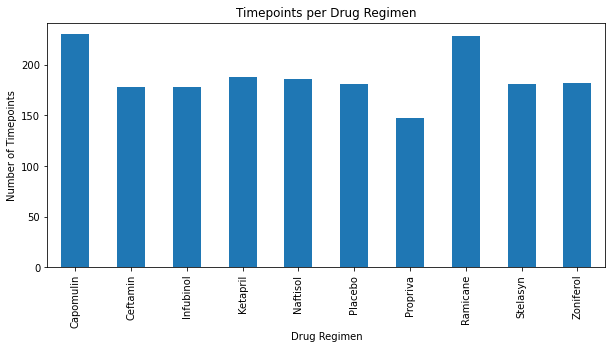

In [21]:
# Set up plot using pandas:

Timepoint_Totals_ByReg_df.plot(kind="bar", figsize=(10, 4.5), legend=False)

plt.title('Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

plt.show()


In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Import potentially helpful dependencies.

import numpy as np

# Reset index to make Drug_Regimen a column in the data frame.

Timepoint_Totals_ByReg_df_Reset=Timepoint_Totals_ByReg_df.reset_index(inplace=True)


In [23]:
# Create list of regimens and set to x-axis.

RegimensToList=Timepoint_Totals_ByReg_df["Drug_Regimen"].tolist()
x_axis=np.arange(len(RegimensToList))
RegimensToList


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [24]:
# Create list of counts per regimen.

SumTimepointsToList=Timepoint_Totals_ByReg_df["Timepoint_Totals_ByReg"].tolist()
SumTimepointsToList


[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

Text(0, 0.5, 'Number of Timepoints')

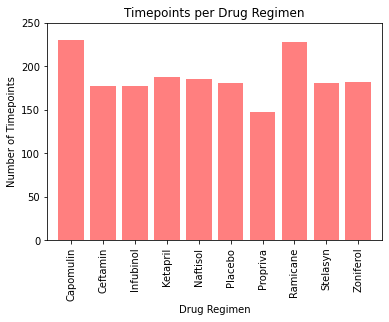

In [25]:
# Set up plot in pyplot:

plt.bar(x_axis, SumTimepointsToList, color='r', alpha=0.5, align="center")
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, RegimensToList, rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(SumTimepointsToList)+20)

plt.title('Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')


In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Create a data frame with the number of each sex.

Sex_Totals=Cleaned_df["Sex"].value_counts()
Sex_Totals_df=({"Sex_Totals":Sex_Totals})
Sex_Totals_df


{'Sex_Totals': Male      958
 Female    922
 Name: Sex, dtype: int64}

In [54]:
Sex_Totals_df.plot(kind="pie", y="Sex", title=("Mouse Gender"))
pie.set_ylabel("Sex")

plt.axis("equal")
plt.show()

AttributeError: 'dict' object has no attribute 'plot'

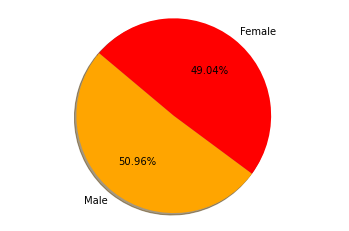

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.

Sex_Totals=Cleaned_df["Sex"].value_counts()

labels=["Male", "Female"]
colors = ["orange","red"]
explode = (0,0)

plt.pie(Sex_Totals, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140, autopct='%0.2f%%')

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
